In [1]:
using DynamicalSystems

In [2]:
#using Plots
using PyPlot

In [14]:
function lorenz!(du, u, p, t)
    du[1] = p[1]*(u[2]-u[1])
    du[2] = p[2]*u[1]-u[2]-u[1]*u[3]
    du[3] = u[1]*u[2]-p[3]*u[3]   
    return nothing
end

lorenz! (generic function with 1 method)

In [3]:
using Random

In [16]:
lr = ContinuousDynamicalSystem(lorenz!, [rand(), rand(),rand()], [10,28,8/3])

3-dimensional continuous dynamical system
 state:       [0.0685268, 0.218676, 0.943817]
 rule f:      lorenz!
 in-place?    true
 jacobian:    ForwardDiff
 parameters:  [10.0, 28.0, 2.66667]

In [4]:
using OrdinaryDiffEq
diffeq = (alg = Tsit5(), reltol = 1e-6, dtmax = 0.01)

(alg = Tsit5(stage_limiter! = trivial_limiter!, step_limiter! = trivial_limiter!, thread = static(false)), reltol = 1.0e-6, dtmax = 0.01)

In [18]:
tr =  trajectory(lr, 100.0; diffeq)

3-dimensional Dataset{Float64} with 10001 points
  0.0685268  0.218676   0.943817
  0.0836702  0.236992   0.919153
  0.0993073  0.259287   0.89519
  0.115776   0.285705   0.871923
  0.1334     0.31648    0.849349
  0.152499   0.351933   0.82747
  0.173396   0.392466   0.806294
  0.196427   0.438567   0.785835
  0.221946   0.490814   0.766115
  0.250332   0.54988    0.747167
  0.281999   0.616537   0.729037
  0.317398   0.691671   0.711786
  0.357028   0.776285   0.695497
  ⋮                    
 12.5895     9.55977   35.3477
 12.2519     8.54343   35.5272
 11.8508     7.55262   35.5495
 11.3957     6.60985   35.426
 10.8972     5.73314   35.1722
 10.3666     4.93557   34.8058
  9.81467    4.22531   34.3454
  9.25209    3.60604   33.8094
  8.68852    3.0776    33.215
  8.13257    2.6368    32.5775
  7.59161    2.27823   31.9105
  7.07171    1.99504   31.2249

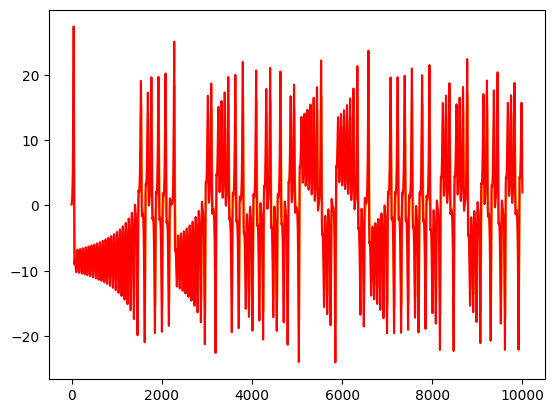

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f12410e0d00>

In [19]:
plot(tr[:, 1], c = "orange")
plot(tr[:, 2], c = "red")

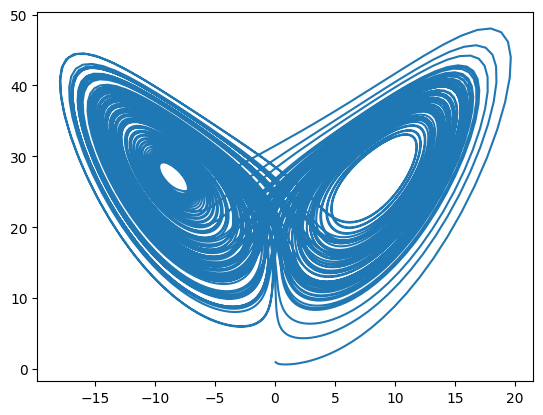

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f1240bf7e20>

In [21]:
plot(tr[:, 1],tr[:, 3])

In [22]:
function coupled_lorenz!(du, u, p, t)
    du[1] = p[1]*(u[2]-u[1])+p[4]*(p[5]*(u[1]+u[4])/2-u[1])
    du[2] = p[2]*u[1]-u[2]-u[1]*u[3] +p[4]*(p[5]*(u[2]+u[5])/2-u[2])
    du[3] = u[1]*u[2]-p[3]*u[3]
    du[4] = p[1]*(u[5]-u[4])+p[4]*(p[5]*(u[1]+u[4])/2-u[4])
    du[5] = p[2]*u[4]-u[5]-u[4]*u[6] +p[4]*(p[5]*(u[2]+u[5])/2-u[5])
    du[6] = u[1]*u[5]-p[3]*u[6]
    return nothing
end

coupled_lorenz! (generic function with 1 method)

In [31]:
coupled_lr = ContinuousDynamicalSystem(coupled_lorenz!, [rand(), rand(),rand(),rand(), rand(),rand()], [10,28,8/3,25,0.5])

6-dimensional continuous dynamical system
 state:       [0.102189, 0.550788, 0.393702, 0.450747, 0.00812904, 0.807884]
 rule f:      coupled_lorenz!
 in-place?    true
 jacobian:    ForwardDiff
 parameters:  [10.0, 28.0, 2.66667, 25.0, 0.5]

In [32]:
tr1 =  trajectory(coupled_lr, 10.0; diffeq)

6-dimensional Dataset{Float64} with 1001 points
 0.102189     0.550788     0.393702    0.450747     0.00812904   0.807884
 0.142902     0.48785      0.383975    0.351762     0.133675     0.786722
 0.164877     0.449485     0.374585    0.287868     0.214352     0.766293
 0.175957     0.425655     0.365466    0.246403     0.266187     0.746538
 0.180804     0.410364     0.356585    0.219306     0.299407     0.727395
 0.182167     0.400056     0.347928    0.201434     0.32056      0.708811
 0.181645     0.392635     0.339484    0.189499     0.333849     0.690748
 0.18016      0.386881     0.331246    0.181393     0.341987     0.673176
 0.178229     0.382088     0.323209    0.175759     0.346727     0.656071
 0.176133     0.377855     0.315369    0.171725     0.349212     0.639416
 0.174022     0.373956     0.307719    0.168727     0.350189     0.623194
 0.171968     0.370268     0.300257    0.166401     0.350148     0.607393
 0.17         0.366722     0.292978    0.16451      0.349414    

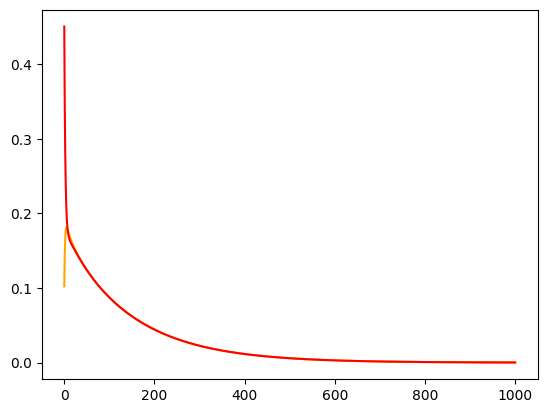

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f1240a73820>

In [33]:
plot(tr1[:, 1], c = "orange")
plot(tr1[:, 4], c = "red")

In [15]:
function 2_coupled_lorenz!(du, u, p, t)
    du[1] = p[1]*(u[2]-u[1])+p[4]*(u[4]-u[1])
    du[2] = p[2]*u[1]-u[2]-u[1]*u[3] 
    du[3] = u[1]*u[2]-p[3]*u[3]
    du[4] = p[1]*(u[5]-u[4])+p[4]*(u[1]-u[4])
    du[5] = p[2]*u[4]-u[5]-u[4]*u[6]
    du[6] = u[1]*u[5]-p[3]*u[6]
    return nothing
end

LoadError: syntax: expected "(" in function definition

In [ ]:
2_coupled_lr = ContinuousDynamicalSystem(coupled_lorenz!, [rand(), rand(),rand(),rand(), rand(),rand()], [10,28,8/3,0.5])

In [ ]:
tr2 =  trajectory(2_coupled_lr, 100.0; diffeq)

In [ ]:
plot(tr2[:, 1], c = "orange")
plot(tr2[:, 4], c = "red")